In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_points = {"X":[1,2,3,4,5,6,7],"Y":[-2,4,6,8,10,100,15]}

In [48]:
df = pd.DataFrame(data=data_points,columns=['X','Y'])

In [49]:
df.head(7)

,X,Y
0,1,-2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,100
6,7,15


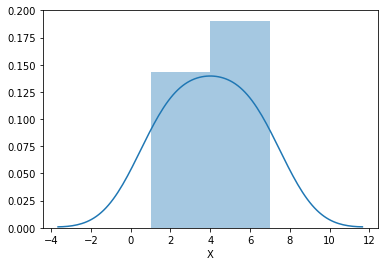

In [50]:
#Given the set of points plot the distribution 
#programatically tell is it left skew or right skew and remove outliers
sns.distplot(df['X'])

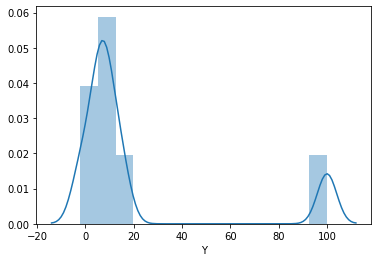

In [62]:
sns.distplot(df['Y'])
#df['Y'].hist()
#plt.hist(df['Y'])

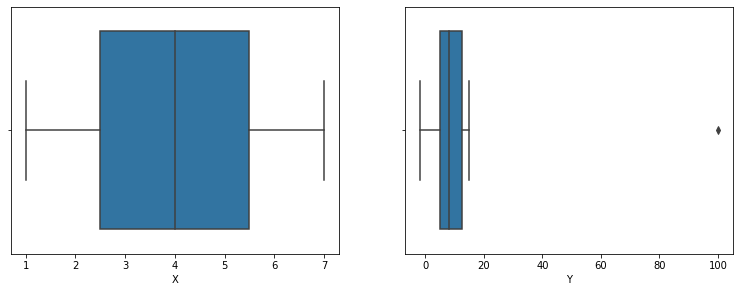

In [52]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,3,1)
sns.boxplot(df['X'])
fig.add_subplot(2,3,2)
sns.boxplot(df['Y'])

In [53]:
def check_outlier(df):
    outlier = {}
    cols_list = df.columns.tolist()
    for i in cols_list:
        if df[i].dtype != 'O':
            Q1 = np.percentile(df[i],25)
            Q3 = np.percentile(df[i],75)
            IQR = Q3 - Q1
            upper_bound = Q3+(1.5*IQR)
            lower_bound = Q1-(1.5*IQR)
            outlier[i] = [upper_bound,lower_bound]
    return outlier

In [54]:
check_outlier(df)

{'X': [10.0, -2.0], 'Y': [23.75, -6.25]}

In [24]:
df.describe()

,X,Y
count,7.000000,7.000000
mean,4.000000,20.142857
std,2.160247,35.601632
min,1.000000,-2.000000
25%,2.500000,5.000000
50%,4.000000,8.000000
75%,5.500000,12.500000
max,7.000000,100.000000


In [57]:
#For an outlier of Y -2.0 we take 1 percentile that is 1 (Flooring)
np.percentile(df['Y'],1)

-1.64

In [58]:
#For an outlier of Y 100 we take 99 percentile that is 94 (Capping)
np.percentile(df['Y'],99)

94.89999999999995

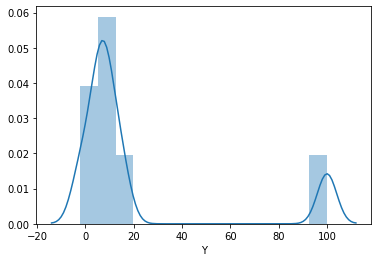

In [63]:
sns.distplot(df['Y'])